In [154]:
from IPython.display import HTML
css_str = '<style> \
.jp-Button path { fill: #616161;} \
text.terms { fill: #616161;} \
</style>'
display(HTML(css_str ))

In [111]:
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%config Completer.use_jedi = False
import pathlib
import os

In [10]:
import pandas as pd
import numpy as np
import re
import tqdm

In [105]:
import spacy
import scispacy
from spacy import displacy
from spacy.lang.en.stop_words import STOP_WORDS

In [107]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

os.environ.update({'MALLET_HOME': r'C:/zhijuncao/py/mallet-2.0.8/'})
mallet_path =  r'C:/zhijuncao/py/mallet-2.0.8/bin/mallet' 
mallet_path

In [112]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

import plotnine as pn
import seaborn as sns
#sns.set_theme(color_codes=False)
#import matplotlib.pyplot as plt

In [45]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from six import StringIO

def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()
    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)
    fp.close()
    device.close()
    str = retstr.getvalue()
    retstr.close()

    return str.replace("\\n","\n")

In [343]:
meta_cardio = pd.read_csv("C:/Users/ZCao/OneDrive - FDA/Desktop/meta_cardio.txt", delimiter='|', names=['abstract','pmid','doi','pdf', 'year','Journal', 'title', 'ID'])

In [345]:
meta_cardio.head(2)

,abstract,pmid,doi,pdf,year,Journal,title,ID
0,Background: Arecae semen (AS) is officially re...,32071608,10.1155/2020/2716325,internal-pdf://0203602212/Jia-2020-Toxicity an...,2020,Evid Based Complement Alternat Med,Toxicity and Its Mechanism Study of Arecae sem...,ID - 875
1,Anthracyclines and HER2-targeted antibodies ar...,31278494,10.1007/s12265-019-09897-y,internal-pdf://0266651532/Asnani-2020-Changes ...,2020,J Cardiovasc Transl Res,Changes in Citric Acid Cycle and Nucleoside Me...,ID - 888


In [219]:
def clean_text(text):
    text = re.split("References\n|REFERENCES\n|Conflicts of Interest\n|CONFLICT OF INTEREST\n|Acknowledgments\n|ACKNOWLEDGMENTS\n|Authors' Contributions|Author contributions|Declaration of interest\n", text)[0]
    text = re.sub("-\n", "",text)
    cleaned = re.sub("\n", " ",text)
   
    return cleaned

In [346]:
path = 'C:/zhijuncao/skyline/QA/qadataanalysis/results/My EndNote Library.Data/PDF/'
pdf = [re.sub('internal-pdf://', path, pdf) for pdf in meta_cardio.pdf]

In [347]:
meta_cardio['pdf_path'] = pdf

In [348]:
full_text = [convert_pdf_to_txt(x) for x in tqdm.tqdm(pdf)]

In [157]:
#print(full_text[0])

In [349]:
full_text_clean = [clean_text(text) for text in full_text]

In [351]:
#full_text_clean[13]

In [352]:
meta_cardio['full_text'] = full_text_clean

In [390]:
meta_cardio.head(10)

,abstract,pmid,doi,pdf,year,Journal,title,ID,pdf_path,full_text
0,Background: Arecae semen (AS) is officially re...,32071608,10.1155/2020/2716325,internal-pdf://0203602212/Jia-2020-Toxicity an...,2020,Evid Based Complement Alternat Med,Toxicity and Its Mechanism Study of Arecae sem...,ID - 875,C:/zhijuncao/skyline/QA/qadataanalysis/results...,Hindawi Evidence-Based Complementary and Alter...
1,Anthracyclines and HER2-targeted antibodies ar...,31278494,10.1007/s12265-019-09897-y,internal-pdf://0266651532/Asnani-2020-Changes ...,2020,J Cardiovasc Transl Res,Changes in Citric Acid Cycle and Nucleoside Me...,ID - 888,C:/zhijuncao/skyline/QA/qadataanalysis/results...,Journal of Cardiovascular Translational Resear...
2,RATIONALE: Preclinical testing of cardiotoxici...,31310161,10.1161/CIRCRESAHA.119.314996,internal-pdf://0369315423/Ou-2019-Physiologica...,2019,Circ Res,Physiological Biomimetic Culture System for Pi...,ID - 887,C:/zhijuncao/skyline/QA/qadataanalysis/results...,ORIGINAL RESEARCH Physiological Biomimetic Cu...
3,Despite advances in supportive and protective ...,31590338,10.3390/ijms20194928,internal-pdf://0494757233/Deidda-2019-Metabolo...,2019,Int J Mol Sci,Metabolomic Perspectives in Antiblastic Cardio...,ID - 883,C:/zhijuncao/skyline/QA/qadataanalysis/results...,Review Metabolomic Perspectives in Antiblastic...
4,"Drug-induced off-target cardiotoxicity, partic...",28421296,10.1007/s00726-017-2419-0,internal-pdf://0526063593/Chaudhari-2017-Metab...,2017,Amino Acids,Metabolite signatures of doxorubicin induced t...,ID - 903,C:/zhijuncao/skyline/QA/qadataanalysis/results...,Amino Acids DOI 10.1007/s00726-017-2419-0 ORI...
5,"Venenum Bufonis, a well-known traditional Chin...",25781638,10.1371/journal.pone.0119515,internal-pdf://0723755653/Dong-2015-Study of t...,2015,PLoS One,Study of the cardiotoxicity of Venenum Bufonis...,ID - 915,C:/zhijuncao/skyline/QA/qadataanalysis/results...,RESEARCH ARTICLE Study of the Cardiotoxicity ...
6,Pinelliae Rhizoma (PR) is a commonly used Chin...,27698376,10.1038/srep34692,internal-pdf://0748569157/Su-2016-Metabolomics...,2016,Sci Rep,Metabolomics reveals the mechanisms for the ca...,ID - 906,C:/zhijuncao/skyline/QA/qadataanalysis/results...,OPEN Received: 24 May 2016 Accepted: 19 Sept...
7,Modern oncologic therapies and care have resul...,30655328,10.2967/jnumed.118.220137,internal-pdf://0888670489/Dreyfuss-2019-Precis...,2019,J Nucl Med,Precision Cardio-Oncology,ID - 890,C:/zhijuncao/skyline/QA/qadataanalysis/results...,T H E S T A T E O F T H E A R T Precision Car...
8,Triphenyl phosphate (TPHP) is a commonly used ...,31368501,10.1093/toxsci/kfz169,internal-pdf://1008137648/Reddam-2019-mRNA-Seq...,2019,Toxicol Sci,mRNA-Sequencing Identifies Liver as a Potentia...,ID - 886,C:/zhijuncao/skyline/QA/qadataanalysis/results...,"TOXICOLOGICAL SCIENCES, 172(1), 2019, 51–62 d..."
9,BACKGROUND: Doxorubicin (DOX) is one of the mo...,22110719,10.1371/journal.pone.0027683,internal-pdf://1057470606/Tan-2011-Potential b...,2011,PLoS One,Potential biomarkers in mouse myocardium of do...,ID - 920,C:/zhijuncao/skyline/QA/qadataanalysis/results...,Potential Biomarkers in Mouse Myocardium of Do...


In [376]:
meta_cardio.to_feather("C:/zhijuncao/R/textming/cardiometa/meta_cardio_full_text.ft")

In [115]:
nlp_sci = spacy.load("en_core_sci_lg")

In [227]:
def nlp_process(doc, model):
    doc_nlp = []
# Iterates through each article in the corpus.
    for d in tqdm.tqdm(doc):
    # Passes that article through the pipeline and adds to a new list.
        pr = model(d)
        doc_nlp.append(pr)
    return doc_nlp

In [353]:
sci = nlp_process(full_text_clean, nlp_sci)

100%|██████████| 29/29 [02:22<00:00,  4.93s/it]


In [354]:
for i in range(len(sci)):
    sci[i].user_data["title"] = f"pmid: {meta_cardio.pmid[i]}, title: {prot_cardio.title[i]}, model: sci"

In [ ]:
sci[13]

In [ ]:
displacy.render(sci[13], style='ent')

In [319]:
#sci_lemm_temp = [[token.lemma_ for token in doc if not (token.__len__()<3 or token.is_stop or token.is_space or token.like_num or token.like_email or token.like_url)] for doc in sci]

In [355]:
#"; ".join(set(sci_lemm_temp[13]))

In [356]:
sci_lemm_temp = [[re.sub(' ', '_',  ent.lemma_) for ent in doc.ents if len(ent.lemma_)>2 and (ent.lemma_ not in STOP_WORDS)] for doc in sci]

In [174]:
def filter_term_fre(docs, k):
    doc_filtered =[]
    for doc in docs:
        term_fre = {term: doc.count(term) for term in set(doc)}
        terms = [term for term in term_fre if term_fre[term]>k]
        terms_k = [term for term in doc if term in terms]
        doc_filtered.append(terms_k)
    return doc_filtered

In [357]:
%%time
sci_lemm = filter_term_fre(sci_lemm_temp,1)

Wall time: 2.12 s


In [327]:
"; ".join(set(sci_lemm[0]))

'attenuate; presentation; potent; cell; complex; original; measure; elicit; detect; energy; group; kit; suppress; activity; link; smae; assign; ros-mediated; incubate; statistical; tca; support; result; density; clinical; protein; cause; metabolism; ﬂuorescence; mass; inhibit; in-gel; mcf-7; gene; bax; chart; dcf; Inc.; immunohistochemistry; wistar; dutp; ×400; follow; normalize; dehydrogenase; tunel; largely; caspase-3; adr-exposed; Science; evaluate; Animal; cleaved; agent; reduction; wash; molecule; Santa; vitro; weight; total; report; speciﬁc; change; abolish; accumulation; organ; herbal; primary; cleavage; build; simultaneous; include; increase; 2-de; disease; ctl; express; Taiwan; partially; network; characterize; Network; transfer; protect; intensity; cardiomyopathy; contribute; detailed; eventually; longevity; reveal; micro; continued; table; majorly; stimulate; vivo; cancer; plus; entirely; nrf2; level; generate; pyruvate; bcl-2; bcl-xl; expression; remain; provide; apoptotic;

In [358]:
%%time
# Creates, which is a mapping of word IDs to words.,
id2word = corpora.Dictionary(sci_lemm)
print(id2word)
id2word.filter_extremes(no_below=2, no_above=1)
print("filtered with no_below=2 ",id2word)
# Turns each document into a bag of words.
corpus = [id2word.doc2bow(doc) for doc in sci_lemm]

Dictionary(3735 unique tokens: ['ASAE', 'Arecae', 'Beijing', 'Beijing_University_of_Chinese_Medicine', 'Bremen']...)
filtered with no_below=2  Dictionary(1042 unique tokens: ['Beijing', 'China', 'Germany', 'METLIN', 'Nanjing']...)
Wall time: 122 ms


In [294]:
num_topics =list(range(5, 40, 5))

In [359]:
%%time
models = []
coherence = []
perplexity = []
for k in tqdm.tqdm(num_topics):
    mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=k, id2word=id2word)
    mallet2lda = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(mallet)
    models.append(mallet2lda)
    
    coherence.append(CoherenceModel(model=mallet2lda, texts=sci_lemm, dictionary=id2word, coherence='c_v').get_coherence())


100%|██████████| 7/7 [05:58<00:00, 51.27s/it]

Wall time: 5min 58s


   topics  coherence
0       5   0.357619
1      10   0.439106
2      15   0.506618
3      20   0.499131
4      25   0.505745
5      30   0.520670
6      35   0.502104


C:\Users\ZCao\AppData\Roaming\Python\Python38\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 5 x 3 in image.
C:\Users\ZCao\AppData\Roaming\Python\Python38\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/zhijuncao/R/textming/cardiometa/cardioprot_full_topic_number_optimization.pdf


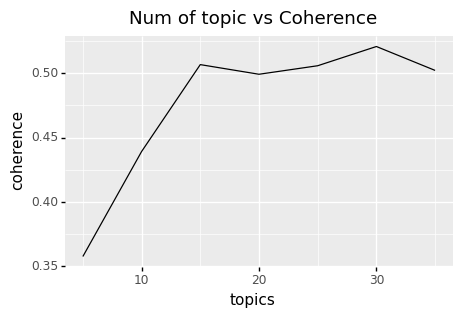

<ggplot: (151862368516)>

In [361]:
eval_para = pd.DataFrame({"topics": num_topics, "coherence":coherence})
print(eval_para)
opti_topic = (pn.ggplot(eval_para, pn.aes('topics', 'coherence'))+ pn.geom_line()+ pn.labels.ggtitle("Num of topic vs Coherence"))
pn.options.figure_size = (5, 3)
opti_topic.save('C:/zhijuncao/R/textming/cardiometa/cardioprot_full_topic_number_optimization.pdf')
opti_topic

In [265]:
def doc_topic_table(ldamodel=mallet2lda, corpus=corpus,topnterm=30):
    sent_topics_df = pd.DataFrame()
    for i, row in tqdm.tqdm(enumerate(ldamodel[corpus])):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_ID, perc_topic) in enumerate(row):
                wp = ldamodel.show_topic(topic_ID, topnterm)
                topic_keywords = ", ".join([word+": "+ str(round(prop,3)) for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([i, round(perc_topic,4), int(topic_ID),  topic_keywords]), ignore_index=True)
        
    sent_topics_df.columns = ['DocID','Perc_Contribution','Topic',  'Topic_Keywords']

    #contents = pd.Series(texts)
    
    sent_topics_df['Topic'] = sent_topics_df['Topic'] +1
   
    
    return(sent_topics_df)

In [250]:
temmodel = models[1]

In [254]:
temmodel.show_topic(1,)

[('treatment', 0.05348418616610954),
 ('sunitinib', 0.04139881717665209),
 ('rat', 0.031884803291334536),
 ('heart', 0.031370532270506554),
 ('datum', 0.028284906145538698),
 ('mouse', 0.02802777063512471),
 ('dose', 0.02262792491643096),
 ('effect', 0.020313705322705065),
 ('cardiotoxicity', 0.019285163281049112),
 ('toxicity', 0.015170995114425302)]

In [378]:
DocID =meta_cardio.loc[:, ['pmid','title']]
DocID['DocID'] = list(range(len(DocID['pmid'])))
sent_topics_df= doc_topic_table(ldamodel=models[5], corpus=corpus,topnterm=10)
doc_topics_result = DocID.merge(sent_topics_df, on='DocID', how='right')
doc_topics_result_sorted = doc_topics_result.sort_values(by=['Topic', 'Perc_Contribution'], ascending=[True, False])
doc_topics_result_sorted = doc_topics_result_sorted.astype({'Topic':'int64'})


29it [00:02, 14.46it/s]


In [379]:
doc_topics_result_sorted.sort_values(by=['Perc_Contribution']).groupby('DocID').apply(lambda x: x.nlargest(2, 'Perc_Contribution')).to_excel('C:/zhijuncao/R/textming/cardiometa/cardiometa_full_dominant2_topic30.xlsx')

In [380]:
doc_topics_result_sorted.to_excel('C:/zhijuncao/R/textming/cardiometa/cardiometa_full_topic30.xlsx')

In [366]:
doc_topics_result_sorted.head(2)

,pmid,title,DocID,Perc_Contribution,Topic,Topic_Keywords
169,28640223,Non-Targeted Metabolomics Analysis of the Effe...,19,0.7453,1,"metabolite: 0.075, identiﬁed: 0.068, sunitinib..."
150,28977680,Effects of the kinase inhibitor sorafenib on h...,17,0.5101,1,"metabolite: 0.075, identiﬁed: 0.068, sunitinib..."


In [381]:
df_pivot = doc_topics_result_sorted.pivot(columns='Topic',values='Perc_Contribution', index='title')

In [197]:
#df_pivot

In [382]:
pn.options.figure_size = (6.4, 6.8)
#doc_topics_result_sorted.query('Perc_Contribution>0')
plot = (pn.ggplot(doc_topics_result_sorted, pn.aes ('factor(Topic)', 'factor(title)' ))+ pn.geom_point(pn.aes(size='Perc_Contribution')))
plot.save('C:/zhijuncao/R/textming/cardiometa/cardiopmeta_full_topic30_dotplot.pdf')

C:\Users\ZCao\AppData\Roaming\Python\Python38\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 6.8 in image.
C:\Users\ZCao\AppData\Roaming\Python\Python38\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/zhijuncao/R/textming/cardiometa/cardiopmeta_full_topic30_dotplot.pdf


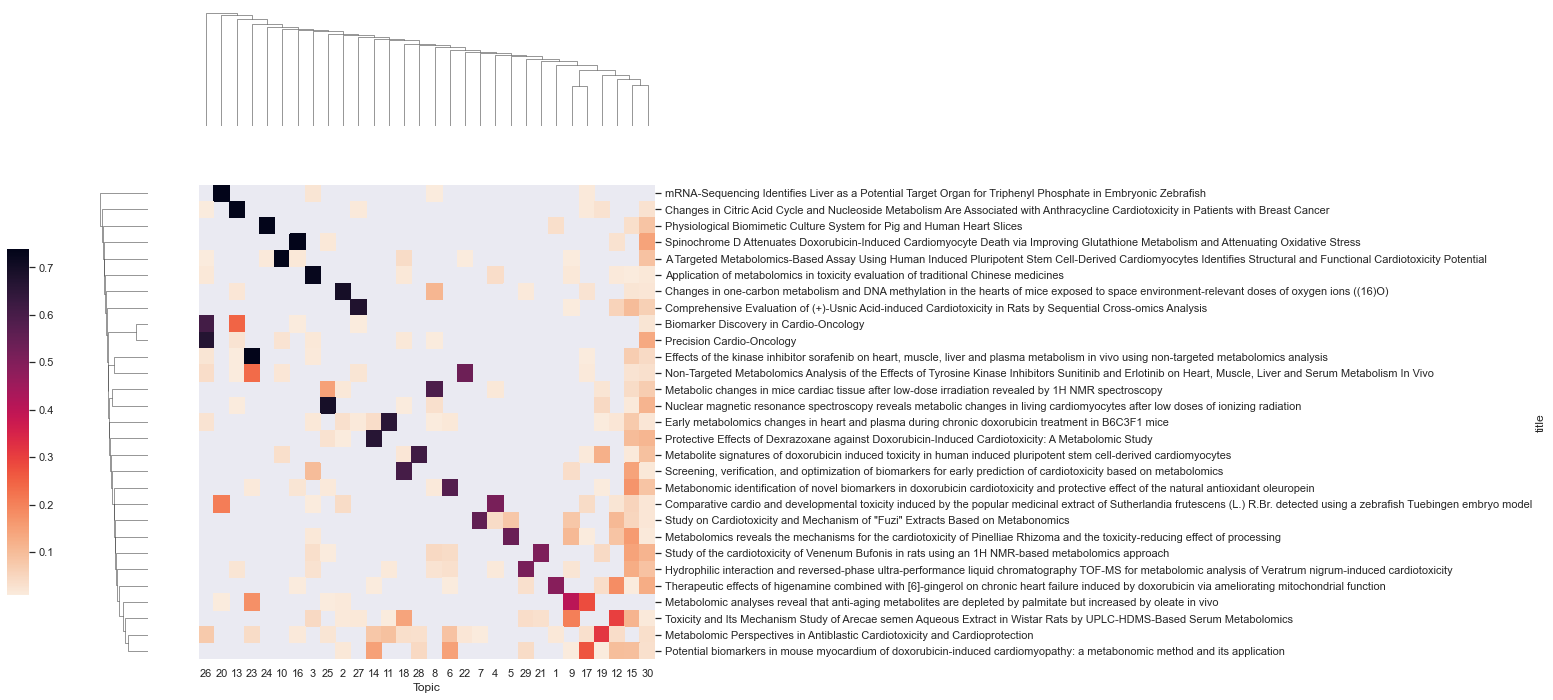

In [384]:
g = sns.clustermap(df_pivot.fillna(0.000001),
                   figsize=(10, 12),
                   row_cluster=True,
                   robust = True,
                   mask=df_pivot.isna(),
                   cmap = 'rocket_r',
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(0, .2, .03, .4))

In [385]:
g.savefig('C:/zhijuncao/R/textming/cardiometa/cardiometa_full_topic30_heatmap.pdf', dpi=1200)

In [386]:
vismallet = gensimvis.prepare(models[5], corpus, dictionary=id2word,  sort_topics=False)

In [387]:
pyLDAvis.save_html(vismallet, "C:/zhijuncao/R/textming/cardiometa/cardiometa_full_topic30.html")

In [388]:
vismallet

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.203623  0.027053       1        1  3.010001
1      0.050848  0.187526       2        1  2.335180
2     -0.098454  0.008929       3        1  2.289101
3      0.140265 -0.036442       4        1  2.301566
4      0.023065  0.131594       5        1  2.749108
5     -0.155288 -0.108013       6        1  2.849199
6      0.188223  0.064015       7        1  3.643012
7     -0.185596  0.017590       8        1  3.151803
8     -0.226668  0.038589       9        1  2.724615
9      0.054292 -0.143956      10        1  4.532607
10    -0.144734  0.001092      11        1  3.983611
11     0.018109 -0.010772      12        1  3.876409
12     0.002028 -0.208934      13        1  2.939052
13    -0.081003 -0.200656      14        1  3.585940
14     0.246450 -0.018337      15        1  5.555409
15    -0.021081 -0.072187      16        1  4.779255
16     0.060362  0.052607      17        1  2.003541
17     0.165362 -0.160828      18        1  3.260549
18    -0.087621  0.090807      19        1  2.745026
19     0.035838  0.085732      20        1  3.520003
20    -0.159725 -0.078346      21        1  2.844792
21    -0.081814 -0.058898      22        1  2.387737
22    -0.089562  0.051163      23        1  3.876197
23     0.136773  0.152126      24        1  3.279802
24    -0.160107  0.080246      25        1  4.046322
25     0.206155 -0.209861      26        1  3.980377
26     0.070634  0.206550      27        1  2.523926
27    -0.030330 -0.074671      28        1  2.534220
28    -0.090459  0.014868      29        1  2.343196
29     0.010417  0.171414      30        1  6.348443, topic_info=                  Term        Freq       Total Category  logprob  loglift
63               group  725.000000  725.000000  Default  30.0000  30.0000
30      cardiotoxicity  534.000000  534.000000  Default  29.0000  29.0000
407                dox  355.000000  355.000000  Default  28.0000  28.0000
97          metabolite  850.000000  850.000000  Default  27.0000  27.0000
71            increase  481.000000  481.000000  Default  26.0000  26.0000
..                 ...         ...         ...      ...      ...      ...
277             effect   48.967089  242.746251  Topic30  -3.6424   1.1561
54          experiment   19.986567   84.953358  Topic30  -4.5385   1.3099
613            express   12.991269   41.635459  Topic30  -4.9693   1.5923
95   metabolic_pathway   11.991940   47.045007  Topic30  -5.0493   1.3901
333            protein   11.991940   47.353734  Topic30  -5.0493   1.3835

[1547 rows x 6 columns], token_table=      Topic      Freq                 Term
term                                      
929      12  0.993273                 1-AP
364      18  0.583689                 14:0
364      19  0.389126                 14:0
880       6  0.197526  1h-nmr_spectroscopy
880      16  0.790105  1h-nmr_spectroscopy
...     ...       ...                  ...
521      18  0.265944               ﬁnding
521      23  0.478699               ﬁnding
174       6  0.594659                 ﬁrst
174       9  0.396439                 ﬁrst
855       9  0.986973             ﬂow_rate

[2553 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])